In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# Input Parameters

Model yang dibuat adalah lapisan bumi homogen secara lateral dengan nilai velocity dan ketebalan masing-masing. Jumlah ray yang digunakan adalah 5.

In [2]:
rays    = 5 # jumlah ray
velo    = np.array([2200, 1300, 2100, 1800, 2500, 1450]) # velocity setiap lapisan
dz      = np.array([800, 200, 750, 1200, 500, 250]) # ketebalan lapisan
layers  = len(velo)

In [3]:
# looping untuk pembentukan sudut takeoff dari setiap ray
# pada kasus ini penulis membuat masing-masing ray memiliki selisih 10 derajat
theta = np.empty(shape = [0, rays])
for i in range(1, rays+1):
    t = i * 10 
    theta = np.array([np.append(theta, t)])

# Ray Parameter

Ketika bekerja pada bidang x dan z, maka komponen vektor slowness arah y ($p_{y}$) bernilai 0 dan menyisakan komponen x ($p_{x}$) dan z ($p_{z}$). Variasi velocity yang digunakan hanya ada pada arah vertikal, sehingga:
$$
p_{x} = p = \sin{i(z)}/V(z)
$$
dimana $i$ adalah sudut takeoff dan $V(z)$ adalah nilai kecepatan pada kedalaman $z$. Dengan menggunakan persamaan eikonal $p^{2} + p_{z}^{2} = V^{-2}$, maka $p_{z}$ dapat dihitung sebagai berikut: 
$$
p_{z} = \sqrt{V^{-2} - p^{2}}
$$


In [4]:
p = np.empty(shape = [0, rays])
for i in range(rays):
    x = np.sin(np.deg2rad(theta[0, i])) / velo[0] # perhitungan nilai px untuk setiap ray
    p = np.array([np.append(p, x)])

pz = np.empty(shape = [layers, rays])
for j in range(rays):
    for i in range(layers):
        pz[i, j] = np.sqrt((1/(velo[i]))**(2) - (p[0, j])**2) # perhitungan nilai pz setiap ray pada setiap lapisan
print(pz)        

[[0.00044764 0.00042713 0.00039365 0.0003482  0.00029218]
 [0.00076517 0.00075336 0.00073489 0.00071158 0.00068591]
 [0.0004696  0.0004501  0.00041845 0.00037602 0.00032483]
 [0.00054992 0.00053336 0.00050694 0.00047252 0.00043289]
 [0.00039214 0.00036855 0.00032916 0.00027319 0.00019686]
 [0.00068512 0.0006719  0.00065113 0.00062471 0.0005953 ]]


# Lateral Displacement

Perpindahan gelombang secara lateral pada setiap kedalaman dapat dihitung dengan menggunakan rasio antara $p$ dan $p_{z}$ yang sudah diketahui. Dengan demikian:
$$
\frac{dx}{dz} = \frac{p}{p_{z}} = \frac{p}{\sqrt{V^{-2} - p^{2}}}\\
dx = \frac{p}{\sqrt{V^{-2} - p^{2}}} dz
$$

In [5]:
dx = np.empty(shape = [layers, rays])
for j in range(rays):
    for i in range(layers):
        dx[i, j] = p[0, j] * dz[i]/ pz[i, j] # perpindahan gelombang pada sumbu offset (x) berdasarkan nilai p dan pz
# print(dx)
a = np.array([np.zeros(rays)])
dx = np.append(a, dx, axis = 0)

for j in range(rays):
    for i in range(1, layers + 1):
        dx[i, j] = dx[i, j] + dx[i - 1, j]
# print(dx)

total_depth = np.sum(dz)
dz = np.append(0, dz)
depth = np.array([np.zeros(len(dz))])
for i in range(1, len(dz)):
    depth[0, 0] = total_depth
    depth[0, i] = total_depth - (np.sum(dz[0:i + 1])) 
# print(depth)

# Plotting

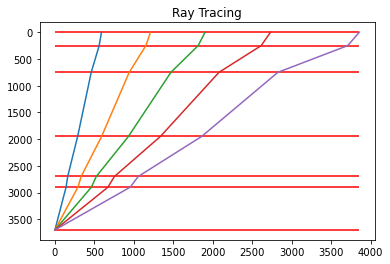

In [6]:
fig, ax = plt.subplots()
for i in range(rays):
    ax.plot(dx[:, i], depth[0, :])
ax.set_title("Ray Tracing")
for i in range(len(depth)):
    plt.hlines(depth[i], 0, np.amax(dx), colors='r')
plt.gca().invert_yaxis()
plt.show()